In [1]:
# 배열의 크기, 반복 횟수 설정
sizes = [
    100, 250, 500, 750, 
    1000, 2500, 5000, 7500, 
    10000, 25000, 50000, 75000, 
    100000, 250000, 500000, 750000,
    1000000
]  # 배열의 크기

SIZE = sizes[8] # 10,000
THRESHODE_RANGE = 250
iterations = 5 # 각 크기별 평균을 내기 위해 반복할 횟수

thresholds = list(range(THRESHODE_RANGE)) # threshold의 범위를 0 ~ 249까지 지정
''' 
    c로 만든 두 가지 정렬(normal Quicksort, threshold used Quicksort)의 시간을 구해 파일에 추가하는 어플리케이션을
    위 두 가지 sizes, iterations을 사용하여, 반복해서 값을 구한다.
'''
for threshold in thresholds:
    for _ in range(iterations):
        !../main.out {SIZE} {threshold}

Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 1 milliseconds
threshold 

In [2]:
'''
    위에서 구한 정렬 시간을 저장한 파일을 가져와서 딕셔너리에 담는다.
'''
# 시간의 합을 저장할 딕셔너리 컨테이너
threshold_used_sort_times = {}

# c 어플리케이션 main.out으로 생성, 추가된 파일 'Quicksort_threshold.txt'를 가져와 한 줄 씩 읽는다.
with open('Quicksort_threshold.txt', 'r') as f:
    # '/n'문자을 기준으로 한 줄씩 가져와 읽는다.
    for line in f:
        size, threshold, quick_sort_time, threshold_used_sort_time = map(int, line.strip().split()) 
                                                                    # .strip(): 양쪽 '\n'문자 제거 
                                                                    # .split(): ' '를 기준으로, 토큰화
        # 딕셔너리 컨테이너에 있는지 현재 크기의 시간 데이터가 있는지 확인
        # 없으면 추가                                            
        if threshold_used_sort_times.get(threshold) == None:
            threshold_used_sort_times[threshold] = threshold_used_sort_time
        # 있으면 합쳐준다.
        else:
            threshold_used_sort_times[threshold] += threshold_used_sort_time
            
# 결과 각 sizes(N)의 배열을 정렬할 때 걸리는 시간의 합을 저장하는 딕셔너리를 얻을 수 있다.
print(f"threshold_used_sort_times: {threshold_used_sort_times}")

threshold_used_sort_times: {0: 4, 1: 4, 2: 5, 3: 4, 4: 5, 5: 5, 6: 4, 7: 4, 8: 4, 9: 5, 10: 5, 11: 4, 12: 4, 13: 7, 14: 6, 15: 4, 16: 5, 17: 5, 18: 3, 19: 6, 20: 3, 21: 4, 22: 4, 23: 2, 24: 2, 25: 2, 26: 6, 27: 5, 28: 5, 29: 5, 30: 2, 31: 5, 32: 3, 33: 3, 34: 4, 35: 5, 36: 4, 37: 4, 38: 4, 39: 5, 40: 4, 41: 5, 42: 3, 43: 4, 44: 5, 45: 2, 46: 4, 47: 6, 48: 4, 49: 5, 50: 2, 51: 4, 52: 4, 53: 4, 54: 3, 55: 4, 56: 5, 57: 5, 58: 3, 59: 6, 60: 2, 61: 5, 62: 5, 63: 4, 64: 6, 65: 5, 66: 4, 67: 4, 68: 5, 69: 3, 70: 4, 71: 4, 72: 3, 73: 6, 74: 4, 75: 5, 76: 4, 77: 5, 78: 5, 79: 5, 80: 3, 81: 5, 82: 6, 83: 6, 84: 3, 85: 4, 86: 4, 87: 5, 88: 3, 89: 4, 90: 4, 91: 4, 92: 3, 93: 4, 94: 5, 95: 4, 96: 4, 97: 5, 98: 3, 99: 6, 100: 3, 101: 5, 102: 4, 103: 6, 104: 5, 105: 5, 106: 6, 107: 3, 108: 5, 109: 4, 110: 5, 111: 5, 112: 7, 113: 2, 114: 5, 115: 4, 116: 5, 117: 4, 118: 4, 119: 4, 120: 4, 121: 3, 122: 5, 123: 5, 124: 5, 125: 4, 126: 6, 127: 5, 128: 5, 129: 5, 130: 4, 131: 3, 132: 6, 133: 6, 134: 5, 13

In [3]:
# 딕셔너리에 저장된 정렬 시간의 평균을 구하는 함수
def average(times: dict, iterations: int) -> list:
    time_average_list: list = []
    for size, sum_time in times.items():
        average: float = sum_time / iterations
        time_average_list.append(average)
    return time_average_list

In [4]:
# quick_sort_average = average(quick_sort_times, iterations)
threshold_used_sort_average = average(threshold_used_sort_times, iterations)

# print(f"quick_sort_average: {quick_sort_average}")
print(f"threshold_used_sort_average: {threshold_used_sort_average}")

threshold_used_sort_average: [0.8, 0.8, 1.0, 0.8, 1.0, 1.0, 0.8, 0.8, 0.8, 1.0, 1.0, 0.8, 0.8, 1.4, 1.2, 0.8, 1.0, 1.0, 0.6, 1.2, 0.6, 0.8, 0.8, 0.4, 0.4, 0.4, 1.2, 1.0, 1.0, 1.0, 0.4, 1.0, 0.6, 0.6, 0.8, 1.0, 0.8, 0.8, 0.8, 1.0, 0.8, 1.0, 0.6, 0.8, 1.0, 0.4, 0.8, 1.2, 0.8, 1.0, 0.4, 0.8, 0.8, 0.8, 0.6, 0.8, 1.0, 1.0, 0.6, 1.2, 0.4, 1.0, 1.0, 0.8, 1.2, 1.0, 0.8, 0.8, 1.0, 0.6, 0.8, 0.8, 0.6, 1.2, 0.8, 1.0, 0.8, 1.0, 1.0, 1.0, 0.6, 1.0, 1.2, 1.2, 0.6, 0.8, 0.8, 1.0, 0.6, 0.8, 0.8, 0.8, 0.6, 0.8, 1.0, 0.8, 0.8, 1.0, 0.6, 1.2, 0.6, 1.0, 0.8, 1.2, 1.0, 1.0, 1.2, 0.6, 1.0, 0.8, 1.0, 1.0, 1.4, 0.4, 1.0, 0.8, 1.0, 0.8, 0.8, 0.8, 0.8, 0.6, 1.0, 1.0, 1.0, 0.8, 1.2, 1.0, 1.0, 1.0, 0.8, 0.6, 1.2, 1.2, 1.0, 0.8, 1.8, 3.2, 1.0, 0.8, 1.0, 1.2, 0.8, 0.8, 1.0, 1.0, 1.6, 1.2, 1.0, 1.2, 1.0, 1.2, 1.2, 1.0, 1.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.2, 1.0, 1.0, 1.2, 1.0, 1.0, 1.2, 1.0, 0.8, 1.2, 1.0, 1.2, 1.0, 1.0, 1.0, 1.0, 1.6, 1.2, 1.4, 1.0, 1.2, 1.0, 1.6, 1.0, 1.0, 1.0, 1.4, 1.8, 1.2, 1.0, 1.8, 1.2, 1.4, 

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50414/3633183629.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


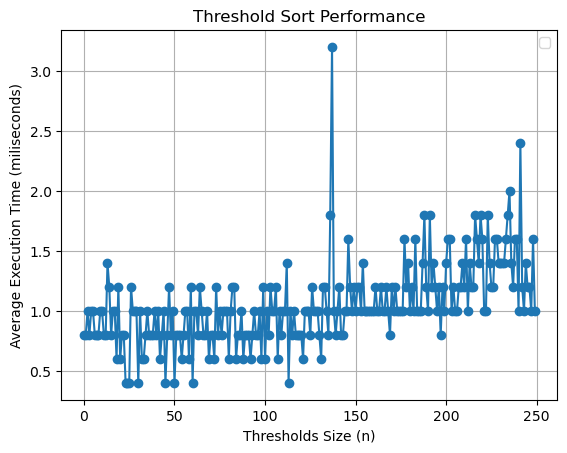

In [5]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 10,000, 임계값: 0-249 반복횟수: 5       
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (n)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 그래프의 범위를 좁혀 유의미한 임계값의 범위를 찾아간다.
thresholds = thresholds[:100] 
threshold_used_sort_average = threshold_used_sort_average[:100]

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50414/1999367258.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


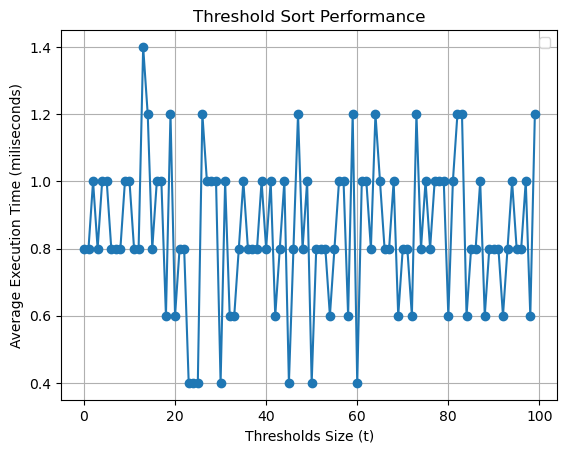

In [7]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 10,000, 임계값: 0-(100 - 1) 반복횟수: 35        
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (t)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()